可以在[Bookshop.org](https://bookshop.org/a/98697/9781098155438) 和
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325)获取纸制版和电子版的*Think Python 3e*.

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://gitee.com/regentsai/Think_Python_3e_CN/blob/master/thinkpython.py');
download('https://gitee.com/regentsai/Think_Python_3e_CN/blob/master/diagram.py');

import thinkpython

# 第3章：函数

在上一章，我们使用了几个Python提供的函数，例如`int`和`float`；以及`math`模块提供的几个函数，例如`sqrt`和`pow`。

在本章，你将学习如何创建自己的函数并运行它们。我们也将看到一个函数如何调用另一个函数。例如，我们将显示Monty Python歌曲的歌词。这些简单的示例展示了重要的特性：编写自己的函数是编程的基础。

## 定义新函数

**函数定义function definition**指定新函数的名字，以及函数调用时运行的语句序列。下面是一个例子：

In [2]:
def print_lyrics():
    print("I'm a lumberjack, and I'm okay.")
    print("I sleep all night and I work all day.")

`def`是表示函数定义的关键字。上例定义的函数名是`print_lyrics`。所有合法的变量名都是合法的函数名。

函数名后空的括号表示这个函数不接受任何参数。

函数定义的第一行称为函数的**头部header**，剩余部分称为函数的**主体body**。函数头必须以冒号结尾，函数体必须缩进。通常缩进是4个空格。上例中函数体是两个print语句；总体而言，函数体可以包含任意数量任意类型的语句。

定义函数将创建一个**函数对象function object**，我们可以像这样显示该对象。

In [3]:
print_lyrics

<function __main__.print_lyrics()>

输出表明`print_lyrics`是不接受参数的函数。`__main__`是包含`print_lyrics`函数的模块名。

译注：在最简单的情况下，`__main__`对应打开Python之后所处的环境。

现在我们定义了一个函数，我们可以像调用内建函数一样调用它。

In [4]:
print_lyrics()

I'm a lumberjack, and I'm okay.
I sleep all night and I work all day.


当运行函数时，将执行函数体中的语句，显示“The Lumberjack Song”中的前两行歌词。

## 参数

我们看到的有些函数是需要参数的；例如，当你调用`abs`函数，你需要传递一个数字作为参数；有些函数接受多个参数，例如`math.pow`接受两个参数，底数和指数。

下面是接受一个参数的函数定义：

In [5]:
def print_twice(string):
    print(string)
    print(string)

函数头括号中的变量称为**形式参数parameter**(简称形参)。当调用函数时，实际参数(argument，简称实参)的值被赋值给形参(parameter)。

译注：**形式参数**是在函数定义时抽象的变量名，为表示函数体内部的逻辑而存在；**实际参数**是在函数调用时提供的变量，有实际的值。本章将明确区分两者，在后续章节不导致歧义的情况下统称参数。

例如，我们可以像下面这样调用`print_twice`。

In [6]:
print_twice('Dennis Moore, ')

Dennis Moore, 
Dennis Moore, 


这与将实参赋值给形参，然后调用函数体中的语句是相同的效果。

译注:想象我们现在在`print_twice`的内部：

In [7]:
string = 'Dennis Moore, '
print(string)
print(string)

Dennis Moore, 
Dennis Moore, 


你也可以将变量作为实参，直接传递给函数。

In [8]:
line = 'Dennis Moore, '
print_twice(line)

Dennis Moore, 
Dennis Moore, 


在上例中，`line`的值被赋值给形参`string`。

## 调用函数

一旦定义了函数，你可以在另一个函数中使用它。我们将编写函数,打印“The Spam Song”(<https://www.songfacts.com/lyrics/monty-python/the-spam-song>)的歌词。

> Spam, Spam, Spam, Spam,  
> Spam, Spam, Spam, Spam,  
> Spam, Spam,  
> (Lovely Spam, Wonderful Spam!)  
> Spam, Spam,

我们将使用下面的函数实现，它接受两个形参。

In [9]:
def repeat(word, n):
    print(word * n)

我们可以使用`repeat`函数打印歌词的第一行。

In [10]:
spam = 'Spam, '
repeat(spam, 4)

Spam, Spam, Spam, Spam, 


要显示前两行，我们可以定义一个新函数，使用到`repeat`函数。

In [11]:
def first_two_lines():
    repeat(spam, 4)
    repeat(spam, 4)

然后调用它：

In [12]:
first_two_lines()

Spam, Spam, Spam, Spam, 
Spam, Spam, Spam, Spam, 


要显示后3行，我们可以定义另一个函数，也用到`repeat`函数：

In [13]:
def last_three_lines():
    repeat(spam, 2)
    print('(Lovely Spam, Wonderful Spam!)')
    repeat(spam, 2)

In [14]:
last_three_lines()

Spam, Spam, 
(Lovely Spam, Wonderful Spam!)
Spam, Spam, 


最后，我们可以将这些函数聚集到一个函数中，打印完整的歌词：

In [15]:
def print_verse():
    first_two_lines()
    last_three_lines()

In [16]:
print_verse()

Spam, Spam, Spam, Spam, 
Spam, Spam, Spam, Spam, 
Spam, Spam, 
(Lovely Spam, Wonderful Spam!)
Spam, Spam, 


当我们运行`print_verse`时，它会调用`first_two_lines`；`first_two_lines`会调用`repeat`；`repeat`会调用`print`。

当然我们可以用更少的函数做相同的事，但这个例子的要点在于展示如何让若干函数一起工作。

## 重复

如果我们想要显示更多的歌词，我们可以使用`for`语句。下面是一个简单的例子。

In [17]:
for i in range(2):
    print(i)

0
1


第一行是以冒号结尾的循环头部，剩余行是必须缩进的循环主体。

头部以关键字`for`开始，然后是新的变量`i`，然后是新的关键字`in`。头部使用`range`函数创建包含`0`和`1`的序列，当我们进行计数时，我们通常从`0`开始。

当执行`for`语句时，它将`range`中的第1个值传递给`i`，然后运行循环体中的`print`函数，将`0`显示出来；

到达循环体的结尾时，它重新回到头部，因此这个语句称作**循环loop**。

循环中的第2次该语句将`range`的下一个值传递给`i`，然后显示`1`。然后由于`1`是`range`的最后一个值，该循环结束。

在下面，我们使用`for`循环语句打印两次歌词：

In [18]:
for i in range(2):
    print("Verse", i)
    print_verse()
    print()

Verse 0
Spam, Spam, Spam, Spam, 
Spam, Spam, Spam, Spam, 
Spam, Spam, 
(Lovely Spam, Wonderful Spam!)
Spam, Spam, 

Verse 1
Spam, Spam, Spam, Spam, 
Spam, Spam, Spam, Spam, 
Spam, Spam, 
(Lovely Spam, Wonderful Spam!)
Spam, Spam, 



你可以将`for`循环语句放在函数中。例如，`print_n_verses`接受形参`n`，显示n次歌词。n必须是整数。

In [19]:
def print_n_verses(n):
    for i in range(n):
        print_verse()
        print()

在上例中，我们在循环中不使用变量`i`，但是在循环头部中必须有一个变量名。

## 变量和形参是局部的

当你在函数内部创建变量，它是**局部的local**，即这个变量只存在于函数内部。例如，下面的函数接受两个参数，拼接后打印两次。

In [20]:
def cat_twice(part1, part2):
    cat = part1 + part2
    print_twice(cat)

下面是一个例子：

In [21]:
line1 = 'Always look on the '
line2 = 'bright side of life.'
cat_twice(line1, line2)

Always look on the bright side of life.
Always look on the bright side of life.


当执行`cat_twice`时，将创建局部变量`cat`，该变量在函数结束时被销毁。如果我们尝试显示它，将产生`NameError`。

In [22]:
%%expect NameError

print(cat)

NameError: name 'cat' is not defined

在函数体外，`cat`变量未被定义。

形参也是局部的。例如，在`cat_twice`函数定义之外，没有对应的`part1`或`part2`变量。

## 栈图

要跟踪每个变量在哪使用，有时绘制**栈图stack diagram**很有用。和状态图一样，栈图会显示每个变量的值，但栈图会显示每个变量所属的函数。

每个函数显示为一个**帧frame**。帧是一个方框，外面有函数的名字，而函数的形参和局部变量在方框内部。

上例的栈图如下：

In [23]:
from diagram import make_frame, Stack

d1 = dict(line1=line1, line2=line2)
frame1 = make_frame(d1, name='__main__', dy=-0.3, loc='left')

d2 = dict(part1=line1, part2=line2, cat=line1+line2)
frame2 = make_frame(d2, name='cat_twice', dy=-0.3, 
                    offsetx=0.03, loc='left')

d3 = dict(string = line1+line2)
frame3 = make_frame(d3, name='print_twice', 
                    offsetx=-0.28, offsety=-0.3, loc='left')

d4 = {"?": line1+line2}
frame4 = make_frame(d4, name='print', 
                    offsetx=-0.28, offsety=0, loc='left')

stack = Stack([frame1, frame2, frame3, frame4], dy=-0.8)

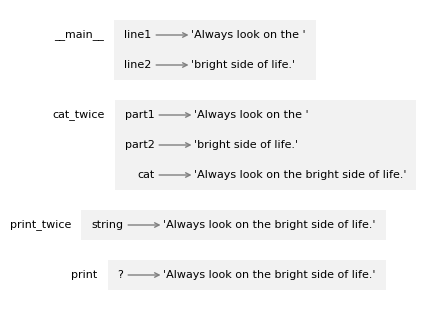

In [24]:
from diagram import diagram, adjust


width, height, x, y = [3.8, 2.91, 1.15, 2.66]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
#adjust(x, y, bbox)

帧按栈排列，标识哪个函数调用了哪个，并以此类推。从底部开始查看，`print`被`print_twice`调用，`print_twice`被`cat_twice`调用，`cat_twice`被`__main__`调用。`__main__`是最顶层帧的特殊名字。当你在函数外创建了变量名，它就属于`__main__`。

译注：与数据结构中的“栈顶”，“栈底”不同，本节的表述是相反的。`__main__`实际是Python最“底层”的帧。以这种顺序表示主要是与下一节回溯信息的实现方式保持一致。

在`print`帧中问号表示我们不知道形参的名字。如果你好奇的话，可以询问虚拟助手，“Python的print函数的形式参数是什么？”

## 回溯

当在函数中出现运行时错误的时候，Python将显示函数的名字，调用这个函数的函数名，以此类推，直到栈顶。

我会定义一个包含错误的`print_twice`版本作为例子。它尝试打印另一个函数的局部变量`cat`。

In [25]:
def print_twice(string):
    print(cat)            # NameError
    print(cat)

运行`cat_twice`，查看会发生什么：

In [26]:
# 这个单元格让Jupyter在出现运行时故障时提供更多调试信息。
# 在进行练习前先运行本单元格。

%xmode Verbose

Exception reporting mode: Verbose


In [27]:
%%expect NameError

cat_twice(line1, line2)

NameError: name 'cat' is not defined

错误信息中包含一个**回溯traceback**，显示错误产生时所在的函数，调用该函数的函数，以此类推。在这个例子中，它显示`cat_twice`调用了`print_twice`，而错误出现在`print_twice`中。

回溯中的函数顺序与栈图的顺序一致。正在运行的函数在最底部。

译注：与上面的栈图有些许不同，上面示例中的回溯没有将print函数的调用情况显示出来，这是因为print函数还没有加入栈，Python就发现了NameError,进行了回溯并终止了程序。

## 为什么使用函数？

现在可能还不能体会到，麻烦地将程序分成若干个函数有什么价值。以下是一些原因：

- 创建新函数让你能够给一组语句进行命名，让你的程序更加易于阅读和调试；
- 通过消除重复代码，函数可以让程序更小。然后，如果你需要修改，你只需要修改一次；
- 将长程序分为若干函数，可以让你一次调试一部分，然后将它们组装成一个整体；
- 设计良好的函数通常对许多程序都有用。一旦你编写并调试好函数，你可以重复利用它。

## 调试

调试可能是令人沮丧的，但也充满挑战，有时是有趣的。调试也是你可以学习的最重要的技能之一。

调试在某些方面像是侦探工作。你获得了一些线索，你必须从你看到的结果，推断发生了什么事。

调试也像是实验科学，一旦你觉得哪里出错了，你可以修改程序并再试一遍。如果你的假设正确，你可以预测修改的结果，从而更接近正确的程序。如果假设错误，你必须重新进行假设。

对于有些人，编程和调试是同一件事，也即编程是不断调试直到满足要求的过程。你应该从有效的程序开始，不断地修改并且调试。

如果你发现自己花了许多时间进行调试，通常说明你在测试之前写了太多代码。如果你及时测试，你的编程速度可能更快。

## 术语表

- **函数定义function definition**：创建函数的语句；
- 函数**头部header**：函数定义的第一行；
- 函数**主体body**：函数定义中的语句序列；
- **函数对象function object**：由函数定义创建的值。函数的名字是一个变量，指向函数对象；
- **形式参数parameter**：函数中使用的变量名，用于接受实际参数的值；
- **循环loop**：执行若干语句的语句，通常是重复执行；
- **局部变量local variable**：在函数内部定义的变量，只能在函数内部被访问；
- **栈图stack diagram**：函数变量与指向的值的栈的图形化表示；
- **栈帧frame**：栈图中表示一个函数调用的方框。包含该函数的局部变量和形参；
- **回溯traceback**：一系列执行中的函数，当错误发生时会被打印。

## 练习

In [28]:
# 这个单元格让Jupyter在出现运行时故障时提供更多调试信息。
# 在进行练习前先运行本单元格。

%xmode Verbose

Exception reporting mode: Verbose


### 询问虚拟助手

习惯上函数或者`for`循环中的语句缩进为4个空格。但不是所有人都同意。如果好奇关于这个争论的历史，询问虚拟助手“告诉我更多Python中关于空格和制表符的历史”。

虚拟助手善于编写小的函数。

1. 让虚拟助手“编写一个函数，函数名为repeat，函数接受一个字符串和一个整数，将字符串打印指定次数”。
2. 如果结果中包含`for`循环，你可以询问：“你能在这个函数中不使用for循环吗？”
3. 选择本章的其他函数，让虚拟助手编写。挑战在于精确地描述函数，得到你想要的功能。使用你目前学到的编程词汇。

虚拟助手也善于对函数进行调试。

1. 询问虚拟助手以下版本的`print_twice`错误在哪。

```py
def print_twice(string):
    print(cat)
    print(cat)
```

如果下面的练习中有些卡住了你，尝试询问虚拟助手。

### 练习

编写函数`print_right`，接受字符串形参`text`，打印该字符串，用空格填充左边，从而让`text`中的最后一个字母出现在一行的第40列。

提示：使用`len`函数，字符串的拼接运算符`+`，以及字符串重复运算符`*`。

以下是一些示例。

```py
print_right("Monty")
print_right("Python's")
print_right("Flying Circus")
```

输出：

```txt
                                   Monty
                                Python's
                           Flying Circus
```

### 练习

编写函数`triangle`，接受一个字符和一个整数，绘制指定高度的金字塔，每行由重复的字符组成，且每行的字符数量增加1。以下是一个`5`层的`L`金字塔。

```py
triangle('L', 5)
```

输出：

```txt
L
LL
LLL
LLLL
LLLLL
```

### 练习

编写函数`rectangle`，接受一个字符和两个整数，用指定的字符绘制指定宽度和高度的矩形。以下是一个宽度`width`为`5`,高度`height`为`4`的由字符`H`绘制的示例。

```py
rectangle('H', 5, 4)
```

输出：

```txt
HHHHH
H   H
H   H
HHHHH
```

### 练习

歌曲“99 Bottles of Beer”的第一段歌词为：

> 99 bottles of beer on the wall  
> 99 bottles of beer  
> Take one down, pass it around  
> 98 bottles of beer on the wall  

第二段歌词与第一段基本相同，只是前两行的99变为98,最后一行的98变成97。这个歌会一直进行，直到最后只剩下0瓶啤酒。

编写函数`bottle_verse`，接受一个数字作为形参，显示从指定数量啤酒开始的那段歌词。

注意：考虑定义可以打印第1,2或第4行歌词的函数，然后在`bottle_verse`中调用这个（些）函数。

以下是一个示例：

```py
bottle_verse(42)
```

输出：

```txt
42 bottles of beer on the wall  
42 bottles of beer  
Take one down, pass it around  
41 bottles of beer on the wall  
```

如果你想要打印完整歌词，你可以使用`for`循环，从`99`倒数到`1`。你不需要完全理解下面的例子，在后续章节会进一步学习`for`循环和`range`函数。

In [ ]:
for n in range(99, 0, -1):
    bottle_verse(n)
    print()

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)